In [18]:
%run "../../PyUtils/common.ipynb"
import pymc3 as pymc3
from pymc3 import *
from numpy import median
from scipy import optimize

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
h='<iframe src="Examples/Futura Apartments.htm" width=100% height="600"></iframe>'
display(HTML(h))

In [9]:
%run "../../PyUtils/common.ipynb"
file="Examples/Futura Apartments.xlsx"

df2 = LoadDataSet(file, sheetname=2);
df2.fillna('', inplace=True)
df2.index = range(len(df2))

df2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Futura Apartments,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Learn about model
0,,,,,,
1,,,,,,
2,,,,,,
3,Number of Rental Units,35.000,,,,
4,Rent per Unit,500.000,,,,
5,Monthly Expenses,15000.000,,,,
6,,,,,,
7,Profit or Loss,2500.000,,,,


In [21]:
def roi(nunits, opcost, rent=500):
    return nunits * rent - opcost

with pymc3.Model() as mcmc:
    nunits = pymc3.Uniform('Number Of Units', 30, 40)
    opcost = pymc3.Normal('Operating Cost', mu=15000, tau=1/(1000*1000) )
    ROI = Deterministic('ROI', roi(nunits=nunits, opcost=opcost, rent=500) )
    
    # obtain starting values via MAP
    start = find_MAP(fmin=optimize.fmin_powell)
    # instantiate sampler
    step = NUTS(scaling=start)
    # draw 2000 posterior samples
    traced = sample(10000, step, start=start)
    
    #traced = sample(1000)


Optimization terminated successfully.
         Current function value: 9.212988
         Iterations: 1
         Function evaluations: 45


100%|██████████| 10000/10000 [00:05<00:00, 1759.20it/s]


2469.16520739 1750.46747296
2469.16520739 1750.46747296


0.92081497849947525

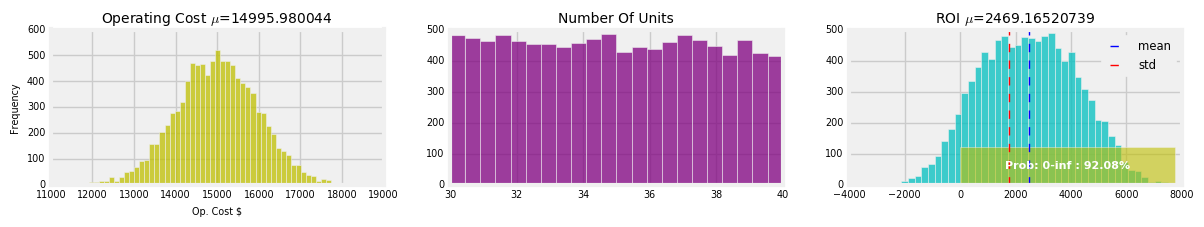

In [15]:
plt.figure(figsize=(13,2))
mn = np.mean(traced['Operating Cost'])
plthist(traced['Operating Cost'], title='Operating Cost $\mu$='+ str(mn), ylabel='Frequency', xlabel='Op. Cost $', facecolor='y', subplot=131);
#n1 = [norm(15000, 1000).rvs() for i in range(1000)]
#plthist(n1, facecolor='r', alpha=0.3,subplot=131);
plthist(traced['Number Of Units'], title='Number Of Units', subplot=132, facecolor='purple')
mn = np.mean(traced['ROI'])
plthist(traced['ROI'], title='ROI $\mu$=' + str(mn), subplot=133, facecolor='c', ablines=['mean', 'std'], legend=True, low=0, high=np.math.inf)

NormProb(traced['ROI'], 0, 80000)

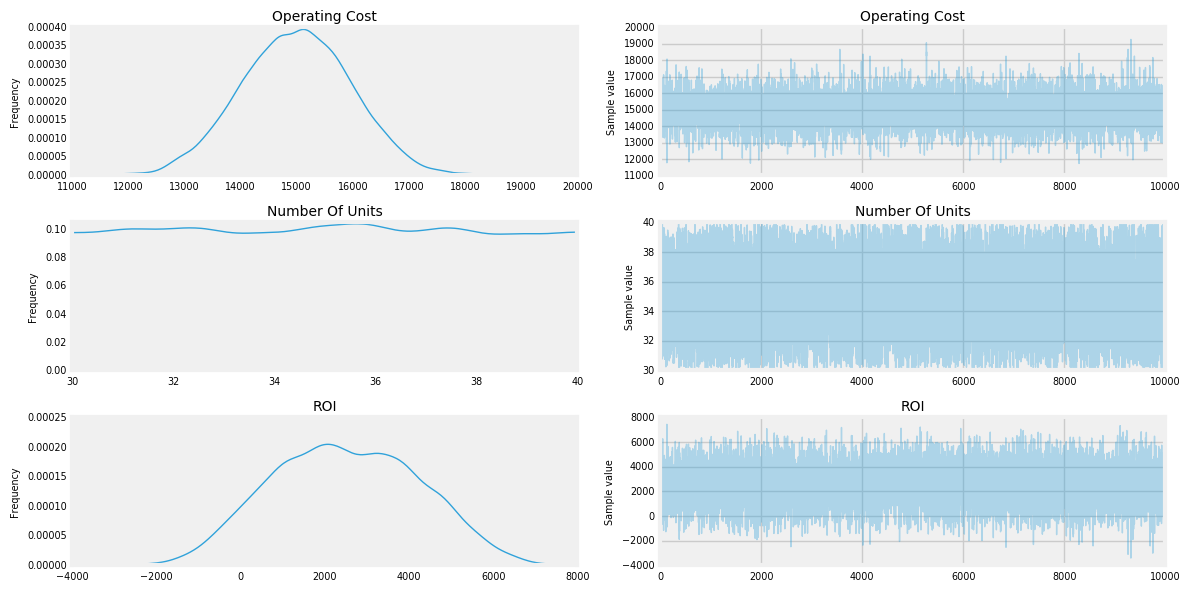

In [22]:
from pymc3 import traceplot
traceplot(traced);